In [ ]:
# Clustering Algorithm

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import os


from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import silhouette_score
import seaborn as snc



In [60]:
# set a seed for reproducibility
np.random.seed(42)

In [62]:
# 1. Loading and Preprocessing 
# ---------------------------------------------------------------------------
iris=load_iris(as_frame=True)
df=iris.frame

In [64]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [68]:
df.shape

(150, 5)

In [70]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [72]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [74]:
#  Drop the species column
x=df.drop('target',axis=1)
y=df['target']


In [76]:
# Scale the features 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

In [84]:
# Set the environment variable
os.environ['OMP_NUM_THREADS'] = '1'

In [110]:
# 2.Clustering Algorithm
# -----------------------------------------------------------------------------

In [112]:
# Brief description of KMeans clustering
print("\n A) KMeans Clustering:")
print("KMeans clustering is an iterative algorithm that aims to partition the dataset into K distinct, non-overlapping clusters. It works by:")
print("1. Randomly initializing K centroids (representative points for each cluster).")
print("2. Assigning each data point to the cluster whose centroid is closest (usually using Euclidean distance).")
print("3. Recalculating the centroids as the mean of all data points assigned to that cluster.")
print("4. Repeating steps 2 and 3 until the centroids no longer change significantly or a maximum number of iterations is reached.")
print("The goal is to minimize the within-cluster sum of squares (WCSS), which is the sum of the squared distances between each data point and its assigned centroid.")

# Explanation of why KMeans might be suitable for the Iris dataset
print("\nWhy KMeans might be suitable for the Iris dataset:")
print("The Iris dataset is relatively small and has a known structure with three distinct classes (though we are not using these labels for clustering). If these classes are well-separated in the feature space, KMeans should be able to identify these natural groupings. KMeans works well with spherical-like clusters of similar variance, which might be the case for the Iris flower features (sepal length, sepal width, petal length, petal width).")


 A) KMeans Clustering:
KMeans clustering is an iterative algorithm that aims to partition the dataset into K distinct, non-overlapping clusters. It works by:
1. Randomly initializing K centroids (representative points for each cluster).
2. Assigning each data point to the cluster whose centroid is closest (usually using Euclidean distance).
3. Recalculating the centroids as the mean of all data points assigned to that cluster.
4. Repeating steps 2 and 3 until the centroids no longer change significantly or a maximum number of iterations is reached.
The goal is to minimize the within-cluster sum of squares (WCSS), which is the sum of the squared distances between each data point and its assigned centroid.

Why KMeans might be suitable for the Iris dataset:
The Iris dataset is relatively small and has a known structure with three distinct classes (though we are not using these labels for clustering). If these classes are well-separated in the feature space, KMeans should be able to iden

In [88]:
# KMeans clustering
n_clusters=3
kmeans=KMeans(n_clusters=n_clusters,random_state=42,n_init=10)
kmeans.fit(x_scaled_df)

C:\Users\anshe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

In [90]:
# Get the cluster labels and centroids
labels_kmeans = kmeans.labels_
centroids_kmeans = kmeans.cluster_centers_

In [94]:
# Visualize the clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled_df)

C:\Users\anshe\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\anshe\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


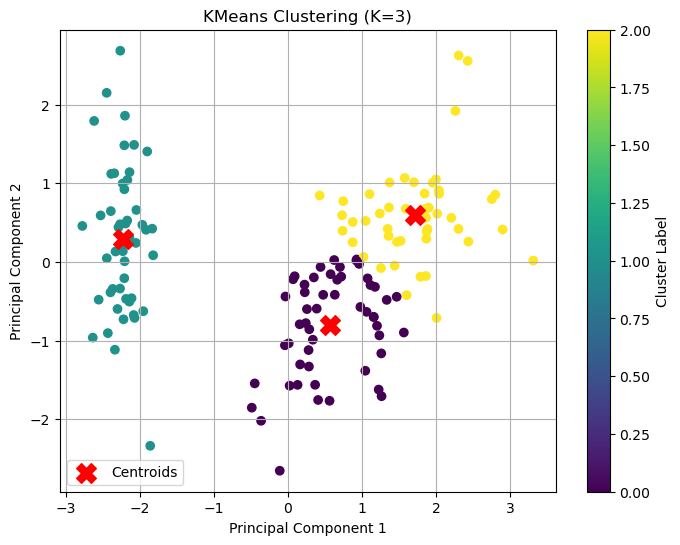

In [96]:

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.scatter(pca.transform(centroids_kmeans)[:, 0], pca.transform(centroids_kmeans)[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title(f'KMeans Clustering (K={n_clusters})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

In [114]:
# Brief description of Hierarchical clustering
print("\n B) Hierarchical Clustering:")
print("Hierarchical clustering is a family of clustering algorithms that builds a hierarchy of clusters. There are two main types:")
print("- Agglomerative (bottom-up): Starts with each data point as a single cluster and iteratively merges the closest pairs of clusters until a single cluster or a desired number of clusters is obtained.")
print("- Divisive (top-down): Starts with a single cluster containing all data points and iteratively splits clusters until each data point forms its own cluster or a desired number of clusters is reached.")
print("The results of hierarchical clustering are often represented as a dendrogram, a tree-like diagram that shows the sequence of merges or splits.")

# Explanation of why Hierarchical clustering might be suitable for the Iris dataset
print("\nWhy Hierarchical clustering might be suitable for the Iris dataset:")
print("Hierarchical clustering doesn't require specifying the number of clusters beforehand, which can be useful when the optimal number of clusters is not known. The dendrogram provides a visual representation of the clustering process at different levels of granularity, allowing us to explore potential cluster structures and decide on a suitable number of clusters by observing where the vertical lines in the dendrogram are longest (indicating larger distances between merged clusters).")


 B) Hierarchical Clustering:
Hierarchical clustering is a family of clustering algorithms that builds a hierarchy of clusters. There are two main types:
- Agglomerative (bottom-up): Starts with each data point as a single cluster and iteratively merges the closest pairs of clusters until a single cluster or a desired number of clusters is obtained.
- Divisive (top-down): Starts with a single cluster containing all data points and iteratively splits clusters until each data point forms its own cluster or a desired number of clusters is reached.
The results of hierarchical clustering are often represented as a dendrogram, a tree-like diagram that shows the sequence of merges or splits.

Why Hierarchical clustering might be suitable for the Iris dataset:
Hierarchical clustering doesn't require specifying the number of clusters beforehand, which can be useful when the optimal number of clusters is not known. The dendrogram provides a visual representation of the clustering process at diff

In [100]:
# Hierarchial clustering
linked = linkage(x_scaled_df, method='ward')

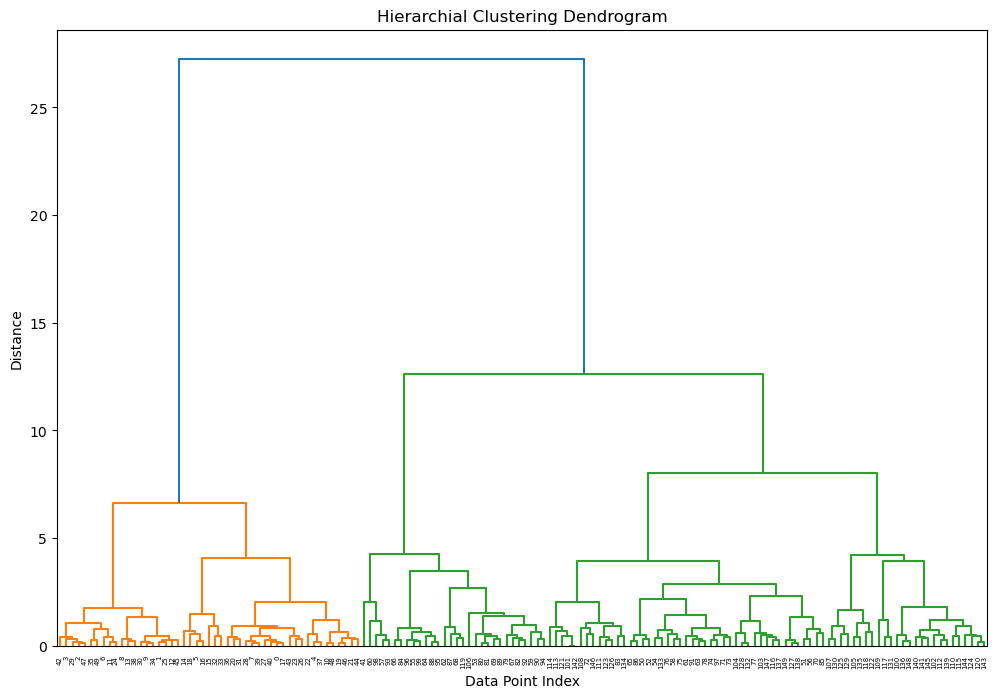

In [104]:
# Visualize the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', labels=x_scaled_df.index.tolist())
plt.title('Hierarchial Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

In [106]:
# Determine clusters based on the dendrogram (e.g., by setting a distance threshold)
from scipy.cluster.hierarchy import cut_tree
n_clusters_hierarchical = 3 # We'll again assume 3 clusters for comparison
clusters_hierarchical = cut_tree(linked, n_clusters=n_clusters_hierarchical).flatten()


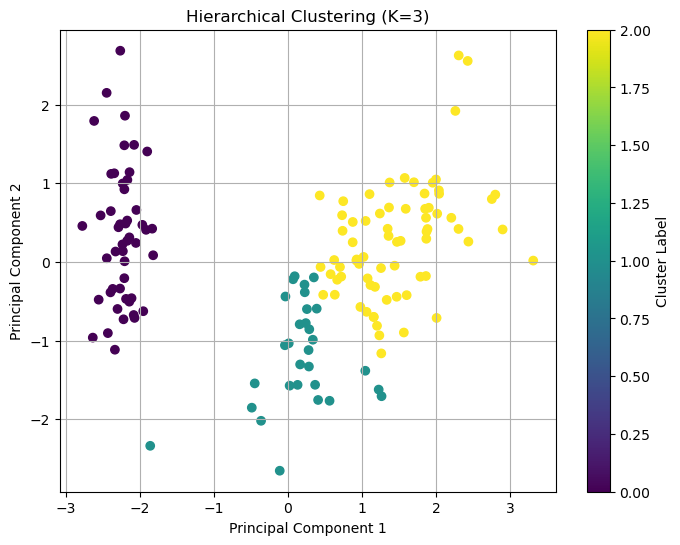

In [108]:
# Visualize the cluster
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_hierarchical, cmap='viridis')
plt.title(f'Hierarchical Clustering (K={n_clusters_hierarchical})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()